In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exploratory Data Analysis

In [51]:
# Step 1: Read the dataset and basic dataframe exploration

df = pd.read_csv('Dataset1.csv')

In [52]:
df.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,DinnerRatings,DinnerReviews,DeliveryRatings,DeliveryReviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am â€“ 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indira...",9.20E+11,1,1,1,1,4.00,462.0,4.10,16000.0,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...","Economical, Prompt Service, Hygiene, Quality F...",450.0
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar M...",9.18E+11,1,1,1,0,4.30,1654.0,4.30,28600.0,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...","Boneless Chicken Biryani, Ample Seating Area, ...",700.0
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",11am â€“ 11pm (Today),"8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Ba...",9.19E+11,1,1,1,0,3.90,411.0,3.50,33200.0,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambia...",300.0
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am â€“ 12midnight (Today),"308, 2nd Stage, 100 Feet Road, Indiranagar, Ba...",9.20E+11,1,1,1,0,2.40,422.0,4.40,8205.0,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White...","Value for Money, Packaging, Staff, Ambience, Food",400.0
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am â€“ 11pm (Today),"38/1A, CMH Road, Indiranagar, Bangalore",9.20E+11,1,1,1,0,2.80,673.0,4.00,9148.0,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, Vi...",400.0


In [53]:
df.columns

Index(['Name', 'URL', 'Cuisines', 'Area', 'Timing', 'Full_Address',
       'PhoneNumber', 'IsHomeDelivery', 'isTakeaway', 'isIndoorSeating',
       'isVegOnly', 'DinnerRatings', 'DinnerReviews', 'DeliveryRatings',
       'DeliveryReviews', 'KnownFor', 'PopularDishes', 'PeopleKnownFor',
       'AverageCost'],
      dtype='object')

In [54]:
df.shape

(8923, 19)

In [55]:
# ML models require examples i.e. rows. A good thumb rule to use is 100 rows per column. Our dataset fits that.

In [56]:
df=df.drop(['URL','Full_Address','PhoneNumber','isVegOnly', 'KnownFor', 'PopularDishes', 'PeopleKnownFor'],axis=1)
df.head()

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,DinnerRatings,DinnerReviews,DeliveryRatings,DeliveryReviews,AverageCost
0,Sri Udupi Park,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am â€“ 11pm (Today),1,1,1,4.00,462.0,4.10,16000.0,450.0
1,Meghana Foods,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,1,1,1,4.30,1654.0,4.30,28600.0,700.0
2,Donne Biriyani House,Biryani,"Indiranagar, Bangalore",11am â€“ 11pm (Today),1,1,1,3.90,411.0,3.50,33200.0,300.0
3,Domino's Pizza,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am â€“ 12midnight (Today),1,1,1,2.40,422.0,4.40,8205.0,400.0
4,KFC,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am â€“ 11pm (Today),1,1,1,2.80,673.0,4.00,9148.0,400.0


In [57]:
df.shape

(8923, 12)

In [58]:
print("\nStep 2: Summary Statistics of Numeric Columns")
df.info()


Step 2: Summary Statistics of Numeric Columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8923 non-null   object 
 1   Cuisines         8923 non-null   object 
 2   Area             8923 non-null   object 
 3   Timing           5820 non-null   object 
 4   IsHomeDelivery   8923 non-null   int64  
 5   isTakeaway       8923 non-null   int64  
 6   isIndoorSeating  8923 non-null   int64  
 7   DinnerRatings    8923 non-null   object 
 8   DinnerReviews    8923 non-null   float64
 9   DeliveryRatings  8923 non-null   object 
 10  DeliveryReviews  8923 non-null   float64
 11  AverageCost      8923 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 836.7+ KB


In [59]:
# 8923 rows in the dataset. Timing has missing values.


In [60]:
df.drop_duplicates(inplace=True)
df.shape

(8922, 12)

In [61]:
#Clean each and every column

In [62]:
df.describe()

,IsHomeDelivery,isTakeaway,isIndoorSeating,DinnerReviews,DeliveryReviews,AverageCost
count,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000
mean,0.997870,0.660054,0.442726,157.123627,2014.913696,340.252186
std,0.046101,0.473717,0.496737,731.873353,5524.706457,308.345734
min,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,1.000000,0.000000,0.000000,0.000000,42.000000,150.000000
50%,1.000000,1.000000,0.000000,0.000000,279.000000,250.000000
75%,1.000000,1.000000,1.000000,43.000000,1493.750000,400.000000
max,1.000000,1.000000,1.000000,26500.000000,99600.000000,4200.000000


In [63]:
df.IsHomeDelivery.value_counts()

1    8903
0      19
Name: IsHomeDelivery, dtype: int64

In [64]:
df.isTakeaway.value_counts()

1    5889
0    3033
Name: isTakeaway, dtype: int64

In [65]:
df.isIndoorSeating.value_counts()

0    4972
1    3950
Name: isIndoorSeating, dtype: int64

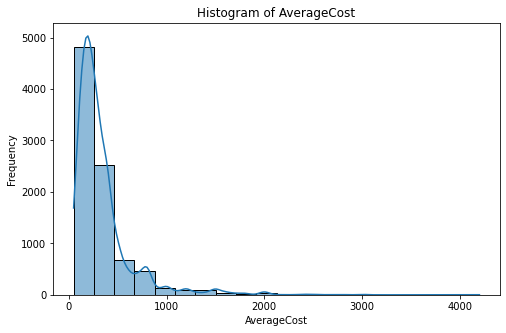

In [66]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['AverageCost'], bins=20, kde=True)
plt.title('Histogram of AverageCost')
plt.xlabel('AverageCost')
plt.ylabel('Frequency')
plt.show()

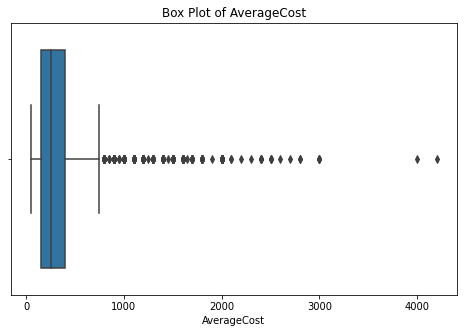

In [67]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AverageCost'])
plt.title('Box Plot of AverageCost')
plt.xlabel('AverageCost')
plt.show()

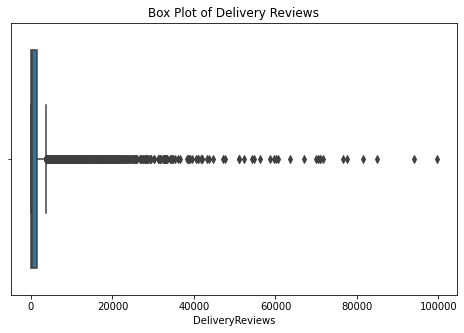

In [68]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['DeliveryReviews'])
plt.title('Box Plot of Delivery Reviews')
plt.xlabel('DeliveryReviews')
plt.show()

In [69]:
df.head()

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,DinnerRatings,DinnerReviews,DeliveryRatings,DeliveryReviews,AverageCost
0,Sri Udupi Park,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am â€“ 11pm (Today),1,1,1,4.00,462.0,4.10,16000.0,450.0
1,Meghana Foods,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,1,1,1,4.30,1654.0,4.30,28600.0,700.0
2,Donne Biriyani House,Biryani,"Indiranagar, Bangalore",11am â€“ 11pm (Today),1,1,1,3.90,411.0,3.50,33200.0,300.0
3,Domino's Pizza,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am â€“ 12midnight (Today),1,1,1,2.40,422.0,4.40,8205.0,400.0
4,KFC,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am â€“ 11pm (Today),1,1,1,2.80,673.0,4.00,9148.0,400.0


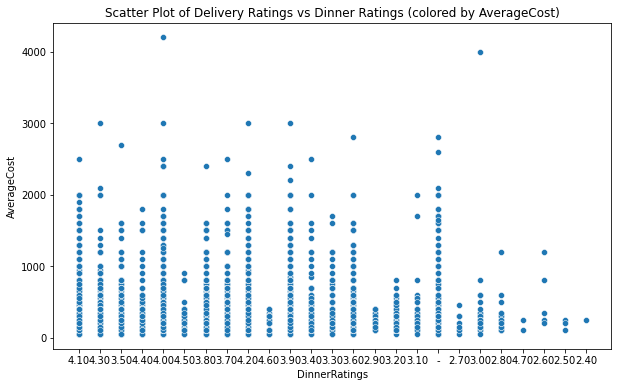

In [70]:
# Bivariate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DeliveryRatings', y='AverageCost',  data=df)
plt.title('Scatter Plot of Delivery Ratings vs Dinner Ratings (colored by AverageCost)')
plt.xlabel('DinnerRatings')
plt.ylabel('AverageCost')

plt.show()

In [71]:
# Step 5: Observations from data visualization
# - There are ID columns which need to be removed
# - There are missing values that require rows to be dropped
# - Outliers require rows to be trimmed
# - Age seems to have a normal distribution with most values clustered around the mean.
# - Region is categorical with four distinct values, and the proportions are relatively balanced.
# - BMI shows some outliers towards the higher end of the distribution.
# - Claim amount is positively correlated with age but seems to have a wider spread for smokers.

# Data Preprocessing

In [72]:
df.shape

(8922, 12)

In [73]:
# Step 2: Remove rows with missing values
df = df.dropna()

In [74]:
df.shape

(5819, 12)

In [75]:
# Step 3: Split numeric columns into X
df_num = df[['DinnerReviews','DeliveryReviews','AverageCost']]
df_num.head()

,DinnerReviews,DeliveryReviews,AverageCost
0,462.0,16000.0,450.0
1,1654.0,28600.0,700.0
2,411.0,33200.0,300.0
3,422.0,8205.0,400.0
4,673.0,9148.0,400.0


In [76]:
# outlier filter

# get thresholds for outlier
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [77]:
lower_bound

DinnerReviews      -193.50
DeliveryReviews   -3143.75
AverageCost        -250.00
dtype: float64

In [78]:
upper_bound

DinnerReviews       322.50
DeliveryReviews    5466.25
AverageCost         950.00
dtype: float64

In [79]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [80]:
df.shape

(4449, 12)

<AxesSubplot:xlabel='DeliveryReviews'>

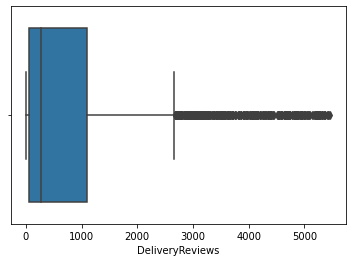

In [81]:
sns.boxplot(x=df['DeliveryReviews'])

In [82]:
df_num = df[['DinnerReviews','DeliveryReviews','AverageCost']]
df_num.shape

(4449, 3)

In [83]:
# outlier filter

# get thresholds for outlier
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [84]:
upper_bound

DinnerReviews        87.5
DeliveryReviews    2669.0
AverageCost         700.0
dtype: float64

In [85]:
df['DinnerReviews'].value_counts()

0.0      1797
1.0       259
2.0       148
3.0       119
4.0        82
         ... 
264.0       1
242.0       1
137.0       1
310.0       1
291.0       1
Name: DinnerReviews, Length: 285, dtype: int64

In [86]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [87]:
df.shape

(3510, 12)

In [88]:
df['DinnerReviews'].value_counts()

0.0     1670
1.0      256
2.0      143
3.0      115
4.0       75
        ... 
65.0       3
57.0       3
49.0       3
79.0       2
84.0       2
Name: DinnerReviews, Length: 88, dtype: int64

<AxesSubplot:xlabel='DeliveryReviews'>

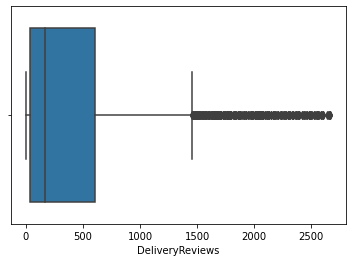

In [89]:
sns.boxplot(x=df['DeliveryReviews'])

In [90]:
df_num =  df[['DinnerReviews','DeliveryReviews','AverageCost']]

df_num.shape

(3510, 3)

In [91]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [93]:
lower_bound

DinnerReviews      -17.625
DeliveryReviews   -811.000
AverageCost       -225.000
dtype: float64

In [94]:
upper_bound

DinnerReviews        29.375
DeliveryReviews    1453.000
AverageCost         775.000
dtype: float64

In [43]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [44]:
df.shape

(2840, 12)

<AxesSubplot:xlabel='DeliveryReviews'>

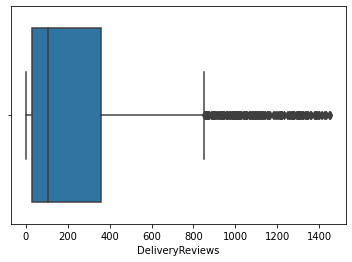

In [45]:
sns.boxplot(x=df['DeliveryReviews'])

In [46]:
X = df.drop('DeliveryReviews', axis=1)
y = df.DeliveryReviews
X.head()

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,DinnerRatings,DinnerReviews,DeliveryRatings,AverageCost
21,Punjabi Dhaba,"North Indian, Mughlai, Chinese","Indiranagar, Bangalore",24 Hours (Today),1,1,1,3.80,6.0,3.40,500.0
34,Kanti Sweets,"Mithai, Street Food, Desserts","Thippasandra, Bangalore",9am â€“ 9:30pm (Today),1,1,0,-,0.0,4.10,50.0
36,Five Star Chicken,"Wraps, Burger, Rolls, Fast Food, Street Food","KR Puram, Bangalore",11am â€“ 11pm (Today),1,1,0,-,0.0,3.90,100.0
38,Donne Biriyani House,"Biryani, Fast Food","Shanti Nagar, Bangalore",Opens at 6:30pm,1,1,1,3.40,7.0,3.90,400.0
51,Amma's Pastries,Bakery,"Indiranagar, Bangalore",8am â€“ 10pm (Today),1,1,0,-,0.0,4.40,100.0


In [47]:
X.head()

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,DinnerRatings,DinnerReviews,DeliveryRatings,AverageCost
21,Punjabi Dhaba,"North Indian, Mughlai, Chinese","Indiranagar, Bangalore",24 Hours (Today),1,1,1,3.80,6.0,3.40,500.0
34,Kanti Sweets,"Mithai, Street Food, Desserts","Thippasandra, Bangalore",9am â€“ 9:30pm (Today),1,1,0,-,0.0,4.10,50.0
36,Five Star Chicken,"Wraps, Burger, Rolls, Fast Food, Street Food","KR Puram, Bangalore",11am â€“ 11pm (Today),1,1,0,-,0.0,3.90,100.0
38,Donne Biriyani House,"Biryani, Fast Food","Shanti Nagar, Bangalore",Opens at 6:30pm,1,1,1,3.40,7.0,3.90,400.0
51,Amma's Pastries,Bakery,"Indiranagar, Bangalore",8am â€“ 10pm (Today),1,1,0,-,0.0,4.40,100.0


In [95]:
X['DinnerReviews'].value_counts()

0.0     1550
1.0      253
2.0      140
3.0      108
4.0       72
6.0       69
5.0       66
7.0       58
9.0       46
8.0       43
10.0      41
12.0      37
11.0      32
14.0      29
16.0      27
13.0      25
23.0      24
19.0      22
24.0      21
18.0      21
17.0      19
21.0      18
15.0      17
28.0      16
25.0      15
27.0      15
20.0      14
26.0      14
22.0      14
29.0      14
Name: DinnerReviews, dtype: int64

In [96]:
X_num = X[['DinnerReviews','DeliveryReviews','AverageCost']]
X_num.head()

KeyError: "['DeliveryReviews'] not in index"

In [ ]:
X_cat = X.select_dtypes('object')
X_cat.head()

In [ ]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [ ]:
type(X_num_scaled)

In [ ]:

X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [ ]:
X_num_scaled.describe()

In [ ]:
# alt way of achieving the same result as the previous cell. here we create a copy of X_num and overwrite it with scaled values
# what is happening is the index i.e. row IDs are retained implicitly versus in the above cell we are handling that explicitly.

#X_num_scaled = X_num.copy()
#scaler = MinMaxScaler()
#X_num_scaled[X_num.columns] = scaler.fit_transform(X_num)

In [ ]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [ ]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [ ]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

In [ ]:
 X_num_scaled.shape

In [ ]:
X_cat_encoded

In [ ]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

In [ ]:
X.describe()

In [ ]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

In [ ]:
# Step 9: Observations after preprocessing
# - ID columns have been removed.
# - Rows with missing values have been removed.
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled (if required, this step is optional based on the algorithm used).
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

# we are ready to fit ML models to train and evaluate using test

In [ ]:
X.to_csv('insurance_claim_features.csv', index=False)
y.to_csv('insurance_claim_label.csv',index=False)